<a href="https://colab.research.google.com/github/sabbir179/test2/blob/main/Forecasting_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Stock Price prediction (1 year) using Facebook Prophet

In [1]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [2]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [3]:
pip install pystan


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.6 MB/s eta 0:00:00


In [4]:
pip install prophet

In [5]:
from prophet import Prophet

In [6]:
import pandas as pd
import plotly.express as px
#from fbprophet import Prophet
#import prophet

In [7]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [8]:
df= pd.read_csv("AMZN.csv")

In [9]:
#read_csv function from pandas

In [10]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-27,94.279999,94.779999,93.139999,93.760002,93.760002,47470300
1,2023-02-28,93.139999,94.690002,92.919998,94.230003,94.230003,43959300
2,2023-03-01,93.870003,94.680000,91.589996,92.169998,92.169998,52299500
3,2023-03-02,91.410004,92.230003,90.389999,92.129997,92.129997,55509400
4,2023-03-03,92.739998,94.940002,92.660004,94.900002,94.900002,55759600
...,...,...,...,...,...,...,...
246,2024-02-20,167.830002,168.710007,165.740005,167.080002,167.080002,41980300
247,2024-02-21,168.940002,170.229996,167.139999,168.589996,168.589996,44575600
248,2024-02-22,173.100006,174.800003,171.770004,174.580002,174.580002,55392400
249,2024-02-23,174.279999,175.750000,173.699997,174.990005,174.990005,59662900


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,130.857650,132.403944,129.423765,131.013825,131.013825,5.489579e+07
std,20.453153,20.468866,20.415916,20.522106,20.522106,1.868756e+07
min,89.970001,92.230003,88.120003,90.730003,90.730003,2.237840e+07
25%,117.465001,120.049999,116.179997,118.860001,118.860001,4.374775e+07
50%,131.110001,133.000000,129.330002,131.470001,131.470001,5.090730e+07
75%,145.040001,146.779999,143.845001,145.209999,145.209999,6.043815e+07
max,175.699997,176.360001,174.485001,175.020004,175.020004,1.529387e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [13]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [14]:
#Area graph
px.area(df, x='Date', y='Close')

In [15]:
# Line graph
px.line(df, x='Date', y='Close')

In [16]:
px.area(df, x='Date', y='Volume')

In [17]:
px.bar(df, y='Volume')


In [18]:
px.box(df, y='Close')

# Understanding Facebook Prophet

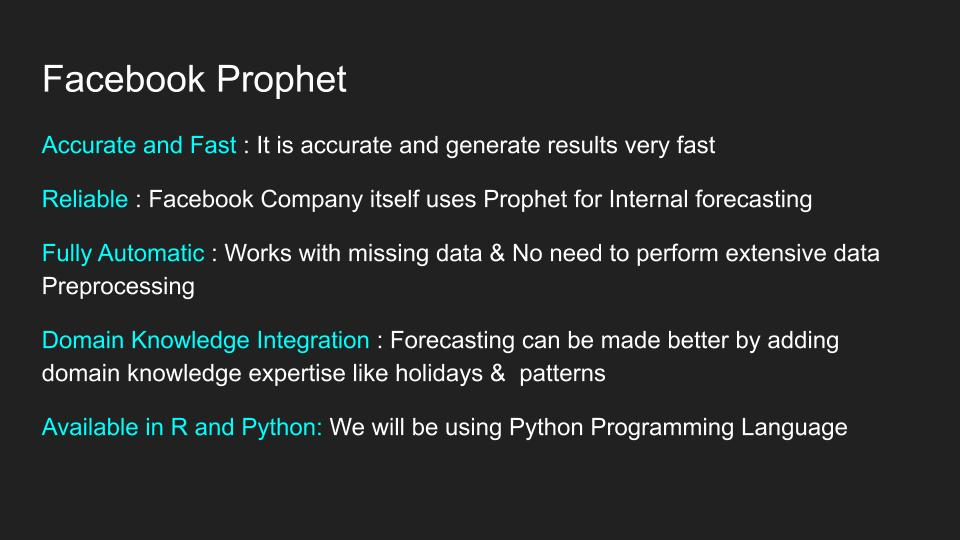

## Data Preperation

In [19]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-27,94.279999,94.779999,93.139999,93.760002,93.760002,47470300
1,2023-02-28,93.139999,94.690002,92.919998,94.230003,94.230003,43959300
2,2023-03-01,93.870003,94.680000,91.589996,92.169998,92.169998,52299500
3,2023-03-02,91.410004,92.230003,90.389999,92.129997,92.129997,55509400
4,2023-03-03,92.739998,94.940002,92.660004,94.900002,94.900002,55759600
...,...,...,...,...,...,...,...
246,2024-02-20,167.830002,168.710007,165.740005,167.080002,167.080002,41980300
247,2024-02-21,168.940002,170.229996,167.139999,168.589996,168.589996,44575600
248,2024-02-22,173.100006,174.800003,171.770004,174.580002,174.580002,55392400
249,2024-02-23,174.279999,175.750000,173.699997,174.990005,174.990005,59662900


In [20]:
columns=['Date', "Close"]
ndf= pd.DataFrame(df, columns=columns)

In [21]:
ndf

,Date,Close
0,2023-02-27,93.760002
1,2023-02-28,94.230003
2,2023-03-01,92.169998
3,2023-03-02,92.129997
4,2023-03-03,94.900002
...,...,...
246,2024-02-20,167.080002
247,2024-02-21,168.589996
248,2024-02-22,174.580002
249,2024-02-23,174.990005


In [22]:
  prophet_df = ndf.rename(columns={'Date':'ds', 'Close':'y'})

In [23]:
prophet_df

,ds,y
0,2023-02-27,93.760002
1,2023-02-28,94.230003
2,2023-03-01,92.169998
3,2023-03-02,92.129997
4,2023-03-03,94.900002
...,...,...
246,2024-02-20,167.080002
247,2024-02-21,168.589996
248,2024-02-22,174.580002
249,2024-02-23,174.990005


## Creating Facebook Prophet Model

In [24]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnrm050vr/5ppmljhy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnrm050vr/_2ljw3pb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30622', 'data', 'file=/tmp/tmpnrm050vr/5ppmljhy.json', 'init=/tmp/tmpnrm050vr/_2ljw3pb.json', 'output', 'file=/tmp/tmpnrm050vr/prophet_modelb1r5x9vm/prophet_model-20240226195118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:51:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:51:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [25]:
future=m.make_future_dataframe(periods=30)
forcast=m.predict(future)

In [26]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-02-27,91.672853,86.540589,97.017619,91.672853,91.672853,-0.033397,-0.033397,-0.033397,-0.033397,-0.033397,-0.033397,0.0,0.0,0.0,91.639455
1,2023-02-28,91.945821,86.453203,96.707932,91.945821,91.945821,-0.536419,-0.536419,-0.536419,-0.536419,-0.536419,-0.536419,0.0,0.0,0.0,91.409402
2,2023-03-01,92.218789,86.575010,96.494778,92.218789,92.218789,-0.886883,-0.886883,-0.886883,-0.886883,-0.886883,-0.886883,0.0,0.0,0.0,91.331906
3,2023-03-02,92.491757,86.452861,96.822019,92.491757,92.491757,-0.677578,-0.677578,-0.677578,-0.677578,-0.677578,-0.677578,0.0,0.0,0.0,91.814180
4,2023-03-03,92.764726,87.893747,97.802000,92.764726,92.764726,0.179245,0.179245,0.179245,0.179245,0.179245,0.179245,0.0,0.0,0.0,92.943971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2024-03-23,179.207164,175.001791,185.368775,178.151858,180.203105,0.977516,0.977516,0.977516,0.977516,0.977516,0.977516,0.0,0.0,0.0,180.184680
277,2024-03-24,179.510902,175.155197,185.769662,178.389507,180.560351,0.977517,0.977517,0.977517,0.977517,0.977517,0.977517,0.0,0.0,0.0,180.488418
278,2024-03-25,179.814639,174.774603,184.849212,178.598869,180.937184,-0.033397,-0.033397,-0.033397,-0.033397,-0.033397,-0.033397,0.0,0.0,0.0,179.781242
279,2024-03-26,180.118376,174.485669,184.957672,178.814471,181.307925,-0.536419,-0.536419,-0.536419,-0.536419,-0.536419,-0.536419,0.0,0.0,0.0,179.581957


##Downloading the Forecast data

In [27]:
px.line(forcast, x='ds', y='yhat')

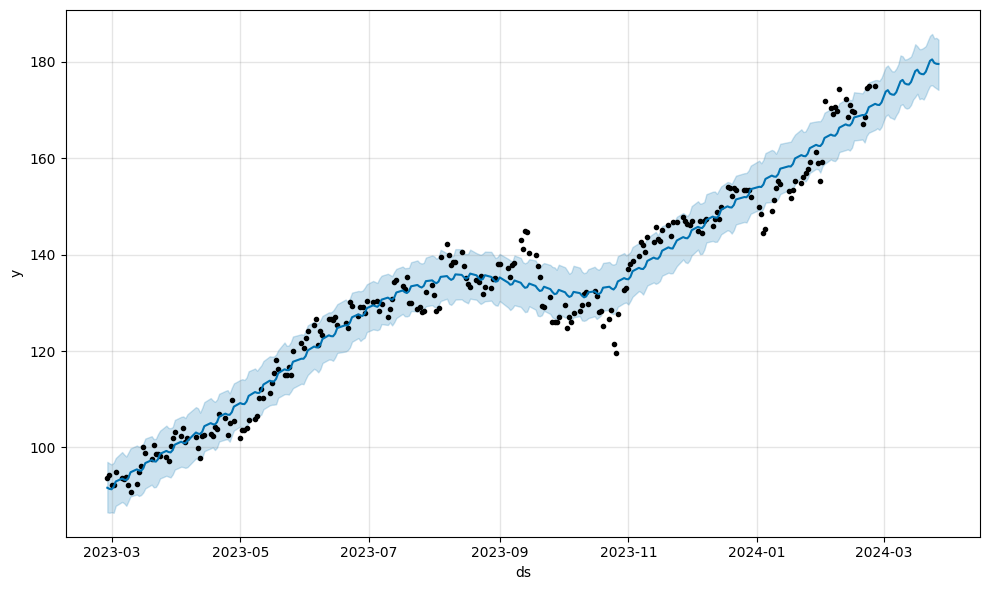

In [28]:
figure=m.plot(forcast, xlabel='ds', ylabel='y')

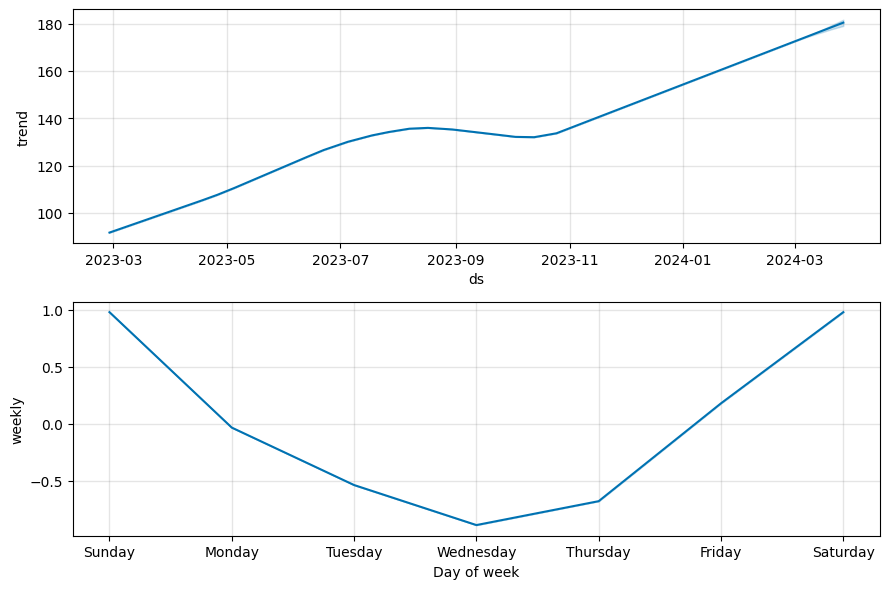

In [29]:
#profit and componet
figure2=m.plot_components(forcast)

Downloading the Forcast data

In [30]:
from google.colab import files
forcast.to_csv('forcast.csv')
files.download('forcast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>